In [2]:
import os
os.chdir('/glade/u/home/shunzlu/work/Projects/SubpolarGyres')

In [3]:
import xarray as xr
import numpy as np
from myfunctions import openpickle, running_mean

In [ ]:
import matplotlib.pyplot as plt
from myplotfunctions import plot_multi_lagged_correlation

In [5]:
gyres_sep_regionmin = openpickle('gyres_sep_regionmin', 'data/')
gyres_ann_regionmin = openpickle('gyres_ann_regionmin', 'data/')
gyres_sep_lonmin = openpickle('gyres_sep_lonmin', 'data/')
gyres_ann_lonmin = openpickle('gyres_ann_lonmin', 'data/')
gyres_sep_meanregion = openpickle('gyres_sep_meanregion', 'data/')
gyres_ann_meanregion = openpickle('gyres_ann_meanregion', 'data/')

In [6]:
# heat_content_ws_ann = openpickle('heat_content_ws_ann', 'data/')
heat_content_rs_ann = openpickle('heat_content_rs_ann', 'data/')
# heat_content_ws_sep = openpickle('heat_content_ws_sep', 'data/')
heat_content_rs_sep = openpickle('heat_content_rs_sep', 'data/')

In [97]:
heat_content_2000_rs_sep = openpickle('heat_content_2000_rs_sep', 'data/')
heat_content_2000_rs_ann = openpickle('heat_content_2000_rs_ann', 'data/')

In [7]:
conv_properties_rs_ann = openpickle('conv_properties_rs_ann', 'data/')
# conv_properties_ws_ann = openpickle('conv_properties_ws_ann', 'data/')
conv_properties_rs_sep = openpickle('conv_properties_rs_sep', 'data/')
# conv_properties_ws_sep = openpickle('conv_properties_ws_sep', 'data/')

In [8]:
fw_properties_rs_ann = openpickle('fw_properties_rs_ann', 'data/')
# fw_properties_ws_ann = openpickle('fw_properties_ws_ann', 'data/')
fw_properties_rs_sep = openpickle('fw_properties_rs_sep', 'data/')
# fw_properties_ws_sep = openpickle('fw_properties_ws_sep', 'data/')

In [9]:
adv_heat_rs_sep = openpickle('adv_heat_rs_sep', 'data/')
adv_heat_rs_ann = openpickle('adv_heat_rs_ann', 'data/')
# adv_heat_ws_sep = openpickle('adv_heat_ws_sep', 'data/')
# adv_heat_ws_ann = openpickle('adv_heat_ws_ann', 'data/')
adv_salt_rs_sep = openpickle('adv_salt_rs_sep', 'data/')
adv_salt_rs_ann = openpickle('adv_salt_rs_ann', 'data/')
# adv_salt_ws_sep = openpickle('adv_salt_ws_sep', 'data/')
# adv_salt_ws_ann = openpickle('adv_salt_ws_ann', 'data/')

In [10]:
adv_heat_horiz_rs_sep_100 = adv_heat_rs_sep['adv_horiz'].sel(lev = slice(0,100)).sum('lev')
adv_salt_horiz_rs_sep_100 = adv_salt_rs_sep['adv_horiz'].sel(lev = slice(0,100)).sum('lev')

adv_heat_horiz_rs_ann_100 = adv_heat_rs_ann['adv_horiz'].sel(lev = slice(0,100)).sum('lev')
adv_salt_horiz_rs_ann_100 = adv_salt_rs_ann['adv_horiz'].sel(lev = slice(0,100)).sum('lev')

In [11]:
curl_sep_timeseries = openpickle('curl_sep_timeseries', 'data/')
curl_ann_timeseries = openpickle('curl_ann_timeseries', 'data/')

In [12]:
ACC_drake_69_sep = openpickle('ACC_drake_69_sep', 'data/')
ACC_drake_69_ann = openpickle('ACC_drake_69_ann', 'data/')

In [13]:
conv_ind_ws = openpickle('conv_ind_ws', 'data/')
conv_ind_rs = openpickle('conv_ind_rs', 'data/')

In [14]:
uas_ann_maxmin = openpickle('uas_ann_maxmin', 'data/')
uas_sep_maxmin = openpickle('uas_sep_maxmin', 'data/')

In [35]:
easterlies_ann = uas_ann_maxmin.minwind.sel(lat = slice(-70, -65)).mean('lat')
easterlies_sep = uas_sep_maxmin.minwind.sel(lat = slice(-70, -65)).mean('lat')

In [19]:
max_lag = 60

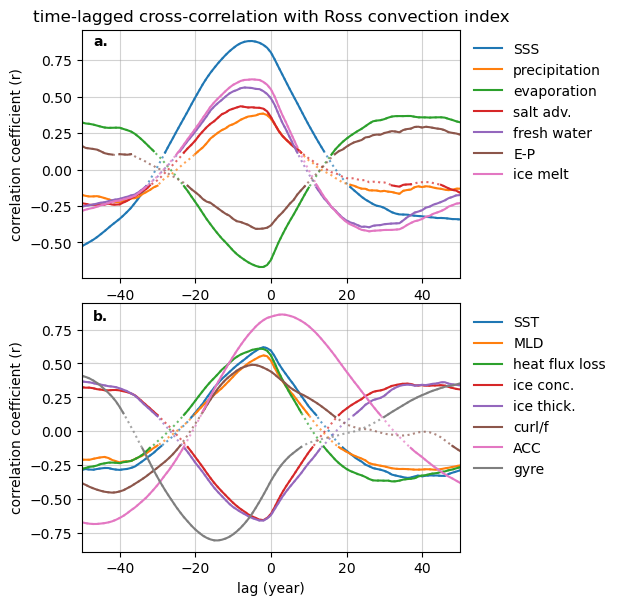

In [124]:
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(2,1,1)
plt.subplots_adjust(left=0.125,
                    bottom=0.08, 
                    right=0.75, 
                    top=0.95, 
                    wspace=0.04, 
                    hspace=0.10)
ross_lag_cor_ann_dict1 = {
    'SSS': conv_properties_rs_ann['so'].isel(lev=0),
    'precipitation': fw_properties_rs_ann['pr'],
    'evaporation': fw_properties_rs_ann['evs'],
    'salt adv.': adv_salt_horiz_rs_ann_100, 
    'fresh water': fw_properties_rs_ann['wfo'],
    'E-P': fw_properties_rs_ann['emp'],
    'ice melt': fw_properties_rs_ann['ice'],
}
plot_multi_lagged_correlation(
    max_lag, -heat_content_rs_sep, ross_lag_cor_ann_dict1, ax1,
    xl = False,
    title="time-lagged cross-correlation with Ross convection index",
    lg_out=True,
    colors=plt.cm.tab10.colors,
    set_xlim=(-50, 50),
    # set_ylim=(-1, 1)
)
ax1.text(-47,0.85,"a.", fontsize=10, fontweight='bold')
ax2 = fig.add_subplot(2,1,2)
ross_lag_cor_ann_dict2 = {
    'SST': conv_properties_rs_ann['thetao'].isel(lev=0),
    'MLD': conv_properties_rs_ann['mld'],
    'heat flux loss': -conv_properties_rs_ann['hfds'],
    'ice conc.': conv_properties_rs_ann['siconc'],
    'ice thick.': conv_properties_rs_ann['sithick'],
    # 'heat adv.': adv_heat_horiz_rs_ann_100, 
    'curl/f': -running_mean(curl_ann_timeseries['rs_box']),
    # 'easterlies': -running_mean(easterlies_ann),
    'ACC': ACC_drake_69_ann,
    'gyre': -gyres_ann_lonmin['rs'],
}
plot_multi_lagged_correlation(
    max_lag, -heat_content_rs_sep, ross_lag_cor_ann_dict2, ax2,
    # title="Properties (ann) Lagged Correlation with Ross convection index",
    lg_out=True,
    colors=plt.cm.tab10.colors,
    set_xlim=(-50, 50),
    # set_ylim=(-1, 1)
)
ax2.text(-47,0.82,"b.", fontsize=10, fontweight='bold')
fig.savefig("RossCrossLag.pdf", format="pdf")